In [1]:
from netCDF4 import Dataset
from netCDFfunc.utility import get_data_sequence, get_data_A, get_data_by_date, to_img, masking, cropping, get_anomaly_heatlevel

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

from collections import Counter
import datetime as dt

import math
from tqdm.notebook import tqdm

In [2]:
base_dir = '/Volumes/T7/AVHRR_OI_SST/v2.1/'

In [3]:
start_date = (1983,1,1)
end_date = (1983,12,31)

In [5]:
ds_in = get_data_by_date(base_dir=base_dir,
                         get_data_func=get_data_A,
                         var_name='sst',
                         start_date=start_date,
                         end_date=end_date)

  0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
ds_ice = get_data_by_date(base_dir=base_dir,
                          get_data_func=get_data_A,
                          var_name='ice',
                          start_date=start_date,
                          end_date=end_date,
                          is_mask=True)

  0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
ds_sst = get_data_by_date(base_dir=base_dir,
                          get_data_func=get_data_A,
                          var_name='sst',
                          start_date=(2020,1,1),
                          end_date=(2020,12,31))

  0%|          | 0/1 [00:00<?, ?it/s]

In [8]:
anomaly_dict = dict()
for (month,day), anomaly in get_anomaly_heatlevel(ds_in, ds_sst, ds_ice):
    anomaly_dict[(month,day)] = anomaly

0it [00:00, ?it/s]

In [ ]:
def to_img(arr, output_path='', date=(), lon=None, lat=None, figsize=(), save_img=False, show_img=False, is_anomaly = False, is_grade=False):
    
    plt.style.use('default')
    
    if date != () : 
        month, day = date   
        date = dt.date(-1,month,day).strftime('%m%d')
    else :
        date = ''
    
    if figsize == ():
        x, y = arr.shape
    else :
        x,y = figsize
        
    x = x/60
    y = y/60
    
    fig, ax = plt.subplots(figsize=(24,12))
    gca_ax = plt.gca()
    
    if arr.dtype == np.float32:
        np.place(arr, arr[:,:]==-999, np.nan)
    
    cmap = cm.jet.copy()

    if is_anomaly == True :
        vmax = 10.2
        vmin = 0
        
    elif is_grade == True :
        vmax = 5
        vmin = 0
        
        grade_0 = np.array([179/256, 241/256, 255/256, 1])
        grade_1 = np.array([255/256, 255/256, 128/256, 1])
        grade_2 = np.array([255/256, 179/256, 53/256, 1])
        grade_3 = np.array([255/256, 129/256, 0/256, 1])
        grade_4 = np.array([203/256, 76/256, 1/256, 1])
        grade_5 = np.array([153/256, 26/256, 0/256, 1])
        new_cmap = np.array([grade_0, grade_1, grade_2, grade_3, grade_4, grade_5])

        if 5 not in arr :
            new_cmap = new_cmap[:-1]
            if 4 not in arr :
                new_cmap = new_cmap[:-1]
                if 3 not in arr :
                    new_cmap = new_cmap[:-1]
                    if 2 not in arr :
                        new_cmap = new_cmap[:-1]
                        if 1 not in arr :
                            new_cmap = new_cmap[:-1]
            
        cmap = ListedColormap(new_cmap)
        
    cmap.set_bad(color='gray')
    cmap.set_under(color=np.array([250/256, 250/256, 250/256, 1]))
    
    if type(lat) != np.ndarray or type(lon) != np.ndarray :
        if is_anomaly == True : im = plt.imshow(arr, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax)
        elif is_grade == True : im = plt.imshow(arr, cmap=cmap, origin='lower', vmin=vmin)
        else : im = plt.imshow(arr, cmap=cmap, origin='lower')
    else :
        im = plt.imshow(arr, cmap=cmap, origin='lower', extent=[lon.min(), lon.max(), lat.min(), lat.max()], vmin=vmin, vmax=vmax) 
    
        plt.xticks(range(0,361, 20))
        plt.yticks(range(-80,81,20))
        plt.grid(True, linestyle='--', color='black')
        
        x_labels = ['20°E','40°E','60°E','80°E','100°E','120°E','140°E','160°E','180°','160°W','140°W','120°W','100°W','80°W','60°W','40°W','20°W','0','20°E']
        y_labels = ['80°S','60°S','40°S','20°S','0°','20°N','40°N','60°N','80°N']
        ax.set_xticklabels(x_labels)
        ax.set_yticklabels(y_labels)
    
    divider = make_axes_locatable(gca_ax)
    cax = divider.append_axes("right", size="3%", pad=0.1)
    if is_grade != True : 
        plt.colorbar(im, cax=cax)
    
    plt.text(-30,0.9,f'{date}',{'fontsize':30}, transform=plt.gca().transAxes, va='top', ha='left')
    
    if save_img == True :
        plt.savefig(output_path, dpi=150, bbox_inches='tight')

    if show_img == True :
        plt.show()
    plt.close()

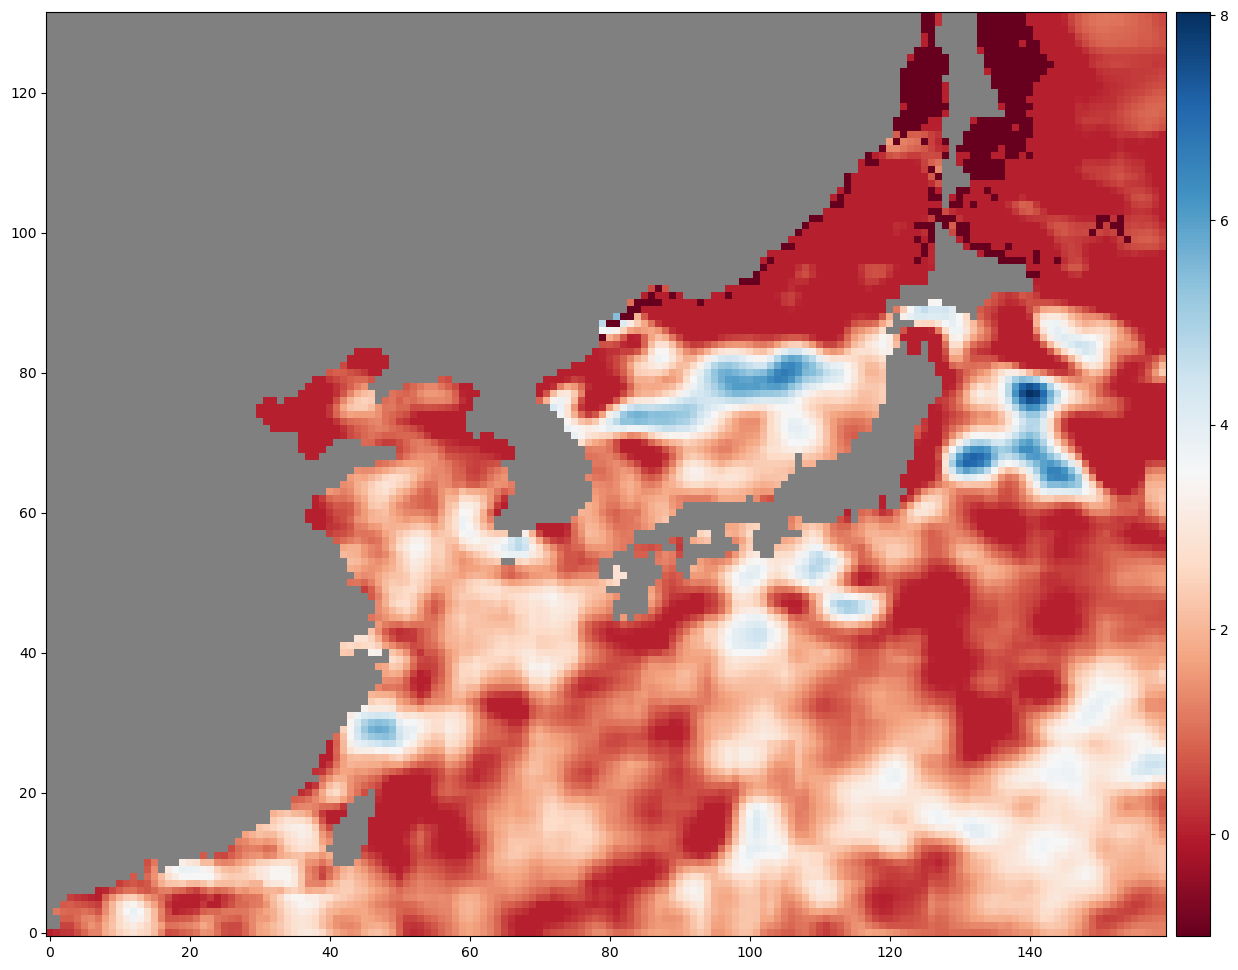

In [9]:
to_img(anomaly, show_img=True, is_anomaly=True)

In [11]:
anomaly_dict[(1,1)]

array([[0.9976597 , 0.99567413, 0.9953346 , ..., 0.5130081 , 0.5323162 ,
        0.53565216],
       [       nan,        nan, 1.1523323 , ..., 0.5213299 , 0.51099586,
        0.52534103],
       [       nan,        nan, 1.222662  , ..., 0.59067535, 0.5923424 ,
        0.59633446],
       ...,
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ],
       [       nan,        nan,        nan, ..., 0.        , 0.        ,
        0.        ]], dtype=float32)